In [24]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import PowerTransformer
from sklearn.manifold import TSNE

def loadData(dataDir, time = 500):
    dataset = np.load(dataDir)
    labels = dataset['arr_0'][:, :, 1:-1] # ignore the first row of labels (all 0)
    properties = dataset['arr_1']
    if time >= 0:
        x = properties[:, :, time]
        #y = labels[:, :, time]
    else:
        x = np.reshape(properties, [properties.shape[0], properties.shape[1] * properties.shape[2]])
        #y = np.reshape(labels, [labels.shape[0], labels.shape[1] * labels.shape[2]])
    y = labels[:, :, -1]
    return np.transpose(x), np.transpose(y)


# Data preporcessing
'loadData' function return the properties of the simulations as x, and corresponding stellar system labels as y.
* 'time' extract the slice of properties at certain time while 'time = -1' select all time with flattend format
* 'y' is set to select the labels of final time in the simulation

The properties are then go through preporcessing step, the yeo-johnson transformation is used to remove skewness and normalized the data ($\mu = 0$, $\sigma=0$)

In [39]:
dataDir = '../data/dataset.npz'
x, y = loadData(dataDir, time = 20)
pt = PowerTransformer(method= 'yeo-johnson', standardize= True)
x_trans = pt.fit_transform(x)


0.17119264637634724
0.10102464632063585
-7.855351589328938e-16
0.9999999999999999


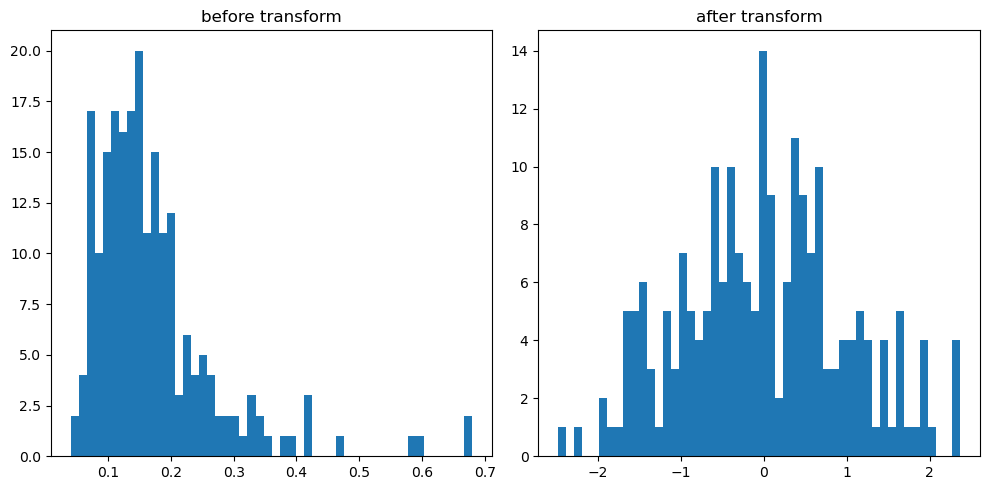

In [40]:
fig1,ax1 = plt.subplots(1, 2, layout = 'tight', figsize = [10, 5])
p = 10
ax1[0].hist(x[:, p], bins = 50)
ax1[0].set_title('before transform')
ax1[1].hist(x_trans[:, p], bins = 50)
ax1[1].set_title('after transform')
print(np.mean(x[:, p]))
print(np.std(x[:, p]))
print(np.mean(x_trans[:, p]))
print(np.std(x_trans[:, p]))

# K-mean clustering
The simple kmeans is applied to the transformed data. 
* PCA is used to reduced the dimension of data to visualize the result

/Users/albertzhang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'Clustering result')

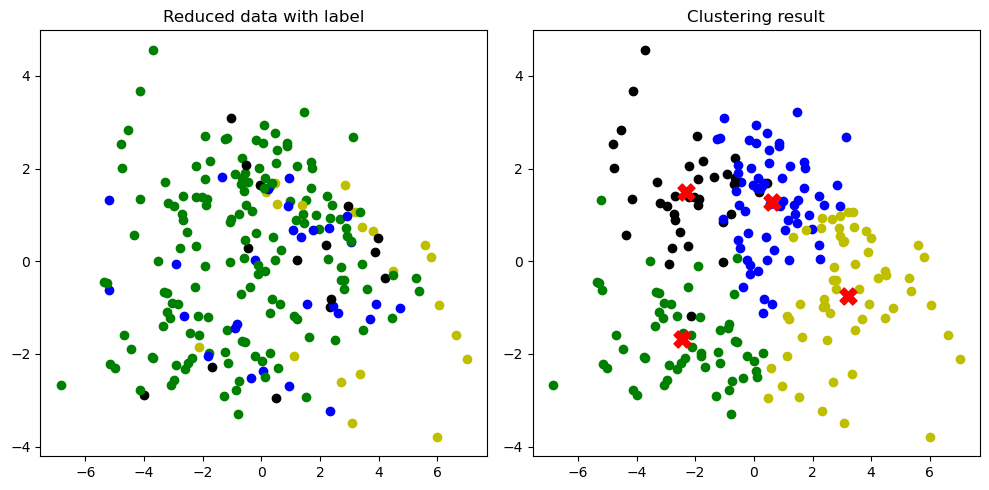

In [41]:

# set up kmeans
kmeans = KMeans(n_clusters=4, init='k-means++', algorithm='lloyd')
kmeans.fit(x_trans)
# use PCA to reduce the dim to first 2 singular vector
pca = PCA(n_components=2)
pca.fit(x_trans)
reducedX = pca.transform(x_trans)
reducedCluster_center = pca.transform(kmeans.cluster_centers_)
fig2,ax2 = plt.subplots(1,2, layout = 'tight', figsize=[10, 5])

color = ['g', 'b', 'k', 'y']
label = ['1', '2', '3', '4']
# plot the data in the reduced dim
for i in range(0, reducedX.shape[0]):
    ax2[0].scatter(reducedX[i, 0], reducedX[i, 1], c = color[np.int32(y[i, 0])-1])
    ax2[1].scatter(reducedX[i, 0], reducedX[i, 1], c = color[kmeans.labels_[i]])

ax2[1].scatter(reducedCluster_center[:, 0], reducedCluster_center[:, 1], c='r', marker = 'X', s=150)
ax2[0].set_title('Reduced data with label')
ax2[1].set_title('Clustering result')


# Spectral Clustering and Dimension reducing using t-SNE
* The Spectral Clustering with radial bias function kernel is applied to the dataset.
* Use t-SNE as dimension reduction method instead of PCA to see nonlinear relation of the dataset

Text(0.5, 1.0, 'Clustering result')

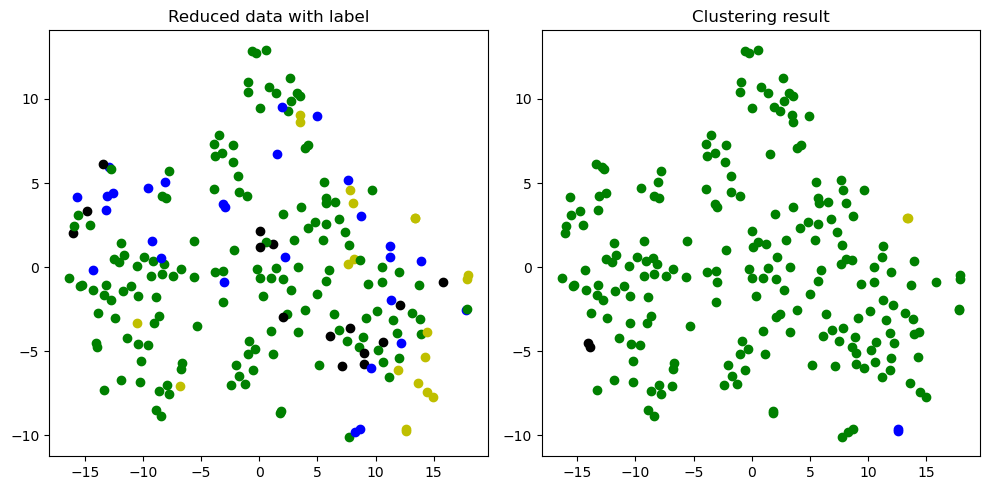

In [43]:
spCluster = SpectralClustering(n_clusters = 4, affinity='rbf')
spCluster.fit(x_trans)
tSNE = TSNE(n_components=2, random_state=100)
reducedX_tsne= tSNE.fit_transform(x_trans)
fig3,ax3 = plt.subplots(1,2, layout = 'tight', figsize=[10, 5])

color = ['g', 'b', 'k', 'y']
label = ['1', '2', '3', '4']
# plot the data in the reduced dim
for i in range(0, reducedX.shape[0]):
    ax3[0].scatter(reducedX_tsne[i, 0], reducedX_tsne[i, 1], c = color[np.int32(y[i, 0])-1])
    ax3[1].scatter(reducedX_tsne[i, 0], reducedX_tsne[i, 1], c = color[spCluster.labels_[i]])

#ax3[1].scatter(reducedCluster_center[:, 0], reducedCluster_center[:, 1], c='r', marker = 'X', s=150)
ax3[0].set_title('Reduced data with label')
ax3[1].set_title('Clustering result')